In [33]:
import requests
from bs4 import BeautifulSoup

In [34]:
url = 'https://www.amazon.fr/s?k=produits&ref=nb_sb_noss'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
response = requests.get(url, headers=headers)

In [35]:
soup = BeautifulSoup(response.content, 'html.parser')
product_links = soup.find_all('a', {'class': 'a-link-normal s-no-outline'})

In [36]:
for link in product_links:
    product_url = 'https://www.amazon.fr' + link.get('href')
    product_response = requests.get(product_url, headers=headers)
    product_soup = BeautifulSoup(product_response.content, 'html.parser')
    product_reviews = product_soup.find_all('div', {'data-hook': 'review'})

    for review in product_reviews:
        review_text = review.find('span', {'data-hook': 'review-body'}).text.strip()
        print(review_text)

Produit efficace, peu de parfumMe convient tout à fait
En lire plus
Produit que j'utilise avec le Kärcher Nettoyeur de sols 2en1 FC 7 sans fil.j'en met environ 15ml dans le bac de 400ml.Ne mousse pas et est efficace.Laisse un léger parfum citronné à peine perceptible.
En lire plus
RAS
En lire plus
Produit reçu conforme.Date de fabrication : 11.2022Produit et notice en allemand mais cela ne me dérange pas.
En lire plus
Produit à utiliser avec la machine FC3 je recommande
En lire plus
Conforme
En lire plus
Produit que j’ai depuis plus d’un an et que j’utilise avec un FC7 rouleaux universels sur du carrelage et des escaliers bois.Avantages :- pas de traces- pas d’ordeur (ou je ne la remarque pas)- la bouteille dure des mois et des mois (on en utilise très très peu)- chez moi c’est efficaceInconvénients- prix au litre élevé (mais le flacon dure des mois, des mois et des mois, je fais l’année avec pour 120m2 lavés chaque semaine…)- bouchon doseur pas pratique : j’ai gardé le petit flacon ve

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to C:\Users\Immanuel
[nltk_data]     Ruraya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Example text data
#text = "Le chat noir est sur le tapis rouge. C'est un beau tapis rouge!"

text = "Produit que j’ai depuis plus d’un an et que j’utilise avec un FC7 rouleaux universels sur du carrelage et des escaliers bois.Avantages :- pas de traces- pas d’ordeur (ou je ne la remarque pas)- la bouteille dure des mois et des mois (on en utilise très très peu)- chez moi c’est efficaceInconvénients- prix au litre élevé (mais le flacon dure des mois, des mois et des mois, je fais l’année avec pour 120m2 lavés chaque semaine…)- bouchon doseur pas pratique : j’ai gardé le petit flacon vendu avec l’appareil FC7 pour bien doser.Kärcher pourrait peut-être plus le parfumer et proposer divers parfums…Je compte bien en racheter car j’en suis très satisfait à tous points de vue."

# Tokenize text into words
tokens = word_tokenize(text.lower())

In [39]:
# Remove stop words and punctuation
stop_words = set(stopwords.words('french'))
punctuations = set(string.punctuation)
filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuations]


In [43]:
# Print filtered tokens
print(filtered_tokens)

['produit', '’', 'depuis', 'plus', '’', 'an', '’', 'utilise', 'fc7', 'rouleaux', 'universels', 'carrelage', 'escaliers', 'bois.avantages', 'traces-', '’', 'ordeur', 'remarque', 'bouteille', 'dure', 'mois', 'mois', 'utilise', 'très', 'très', 'peu', 'chez', '’', 'efficaceinconvénients-', 'prix', 'litre', 'élevé', 'flacon', 'dure', 'mois', 'mois', 'mois', 'fais', '’', 'année', '120m2', 'lavés', 'chaque', 'semaine…', 'bouchon', 'doseur', 'pratique', '’', 'gardé', 'petit', 'flacon', 'vendu', '’', 'appareil', 'fc7', 'bien', 'doser.kärcher', 'pourrait', 'peut-être', 'plus', 'parfumer', 'proposer', 'divers', 'parfums…je', 'compte', 'bien', 'racheter', 'car', '’', 'très', 'satisfait', 'tous', 'points', 'vue']


In [44]:
import torch
from transformers import CamembertTokenizer, CamembertModel

In [45]:
# Load pre-trained CamemBERT model and tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
model = CamembertModel.from_pretrained('camembert-base')

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [46]:
# Example text data
text = "Produit que j’ai depuis plus d’un an et que j’utilise avec un FC7 rouleaux universels sur du carrelage et des escaliers bois.Avantages :- pas de traces- pas d’ordeur (ou je ne la remarque pas)- la bouteille dure des mois et des mois (on en utilise très très peu)- chez moi c’est efficaceInconvénients- prix au litre élevé (mais le flacon dure des mois, des mois et des mois, je fais l’année avec pour 120m2 lavés chaque semaine…)- bouchon doseur pas pratique : j’ai gardé le petit flacon vendu avec l’appareil FC7 pour bien doser.Kärcher pourrait peut-être plus le parfumer et proposer divers parfums…Je compte bien en racheter car j’en suis très satisfait à tous points de vue."

In [47]:
# Tokenize text into input IDs
input_ids = torch.tensor([tokenizer.encode(text)])

In [48]:
# Generate hidden states from CamemBERT model
with torch.no_grad():
    hidden_states = model(input_ids)[0]

In [49]:
# Print hidden states
print(hidden_states)

tensor([[[ 0.0174,  0.0503, -0.0214,  ..., -0.1839,  0.0667,  0.0915],
         [ 0.0580, -0.1525, -0.2019,  ...,  0.0325,  0.0239,  0.0853],
         [-0.0325,  0.1147, -0.0808,  ..., -0.1185, -0.1024,  0.1379],
         ...,
         [ 0.0751,  0.0525, -0.0775,  ..., -0.0939,  0.0202,  0.0643],
         [-0.0135,  0.0463, -0.0145,  ..., -0.1587,  0.0127,  0.1627],
         [-0.0286,  0.0892, -0.0274,  ..., -0.1315,  0.0021,  0.0660]]])


In [50]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [52]:
# Example text data
text = "Produit que j’ai depuis plus d’un an et que j’utilise avec un FC7 rouleaux universels sur du carrelage et des escaliers bois.Avantages :- pas de traces- pas d’ordeur (ou je ne la remarque pas)- la bouteille dure des mois et des mois (on en utilise très très peu)- chez moi c’est efficaceInconvénients- prix au litre élevé (mais le flacon dure des mois, des mois et des mois, je fais l’année avec pour 120m2 lavés chaque semaine…)- bouchon doseur pas pratique : j’ai gardé le petit flacon vendu avec l’appareil FC7 pour bien doser.Kärcher pourrait peut-être plus le parfumer et proposer divers parfums…Je compte bien en racheter car j’en suis très satisfait à tous points de vue"

In [53]:
# Remove punctuation and convert to lowercase
text = text.translate(str.maketrans("", "", string.punctuation))
text = text.lower()


In [54]:
# Tokenize text into words
tokens = word_tokenize(text)

In [55]:
# Remove stop words
stop_words = set(stopwords.words('french'))
filtered_tokens = [token for token in tokens if token not in stop_words]

In [56]:
# Lemmatize tokens
lemmatizer = nltk.WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

In [57]:
# Join lemmatized tokens into a string
clean_text = ' '.join(lemmatized_tokens) 

In [58]:
# Print clean text
print(clean_text)

produit ’ depuis plus ’ an ’ utilise fc7 rouleau universels carrelage escaliers boisavantages trace ’ ordeur remarque bouteille dure mois mois utilise très très peu chez ’ efficaceinconvénients prix litre élevé flacon dure mois mois mois fais ’ année 120m2 lavés chaque semaine… bouchon doseur pratique ’ gardé petit flacon vendu ’ appareil fc7 bien doserkärcher pourrait peutêtre plus parfumer proposer diver parfums…je compte bien racheter car ’ très satisfait tous point vue


In [59]:
# Example preprocessed corpus of text data
corpus = "Produit que j’ai depuis plus d’un an et que j’utilise avec un FC7 rouleaux universels sur du carrelage et des escaliers bois.Avantages :- pas de traces- pas d’ordeur (ou je ne la remarque pas)- la bouteille dure des mois et des mois (on en utilise très très peu)- chez moi c’est efficaceInconvénients- prix au litre élevé (mais le flacon dure des mois, des mois et des mois, je fais l’année avec pour 120m2 lavés chaque semaine…)- bouchon doseur pas pratique : j’ai gardé le petit flacon vendu avec l’appareil FC7 pour bien doser.Kärcher pourrait peut-être plus le parfumer et proposer divers parfums…Je compte bien en racheter car j’en suis très satisfait à tous points de vue"

# Split corpus into words
words = corpus.split()

# Print the first 150 words
print(" ".join(words[:150]))

Produit que j’ai depuis plus d’un an et que j’utilise avec un FC7 rouleaux universels sur du carrelage et des escaliers bois.Avantages :- pas de traces- pas d’ordeur (ou je ne la remarque pas)- la bouteille dure des mois et des mois (on en utilise très très peu)- chez moi c’est efficaceInconvénients- prix au litre élevé (mais le flacon dure des mois, des mois et des mois, je fais l’année avec pour 120m2 lavés chaque semaine…)- bouchon doseur pas pratique : j’ai gardé le petit flacon vendu avec l’appareil FC7 pour bien doser.Kärcher pourrait peut-être plus le parfumer et proposer divers parfums…Je compte bien en racheter car j’en suis très satisfait à tous points de vue


In [60]:
import nltk
from nltk.probability import FreqDist

In [61]:
# Example preprocessed corpus of text data
corpus = "chat noir tapis rouge beau tapis"

# Split corpus into words
words = corpus.split()

# Compute word frequency distribution
freq_dist = FreqDist(words)

In [62]:
# Print top 10 most common words and their frequencies
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

tapis: 2
chat: 1
noir: 1
rouge: 1
beau: 1


In [63]:
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

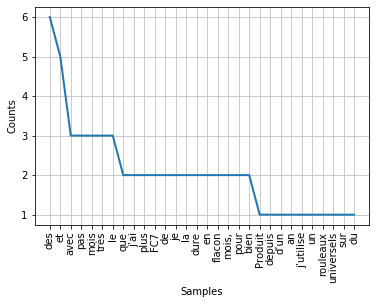

In [64]:
# Example preprocessed corpus of text data
corpus = "Produit que j’ai depuis plus d’un an et que j’utilise avec un FC7 rouleaux universels sur du carrelage et des escaliers bois.Avantages :- pas de traces- pas d’ordeur (ou je ne la remarque pas)- la bouteille dure des mois et des mois (on en utilise très très peu)- chez moi c’est efficaceInconvénients- prix au litre élevé (mais le flacon dure des mois, des mois et des mois, je fais l’année avec pour 120m2 lavés chaque semaine…)- bouchon doseur pas pratique : j’ai gardé le petit flacon vendu avec l’appareil FC7 pour bien doser.Kärcher pourrait peut-être plus le parfumer et proposer divers parfums…Je compte bien en racheter car j’en suis très satisfait à tous points de vue"

# Split corpus into words
words = corpus.split()

# Compute word frequency distribution
freq_dist = FreqDist(words)

# Plot word frequency distribution
freq_dist.plot(30, cumulative=False)
plt.show()

In [65]:
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

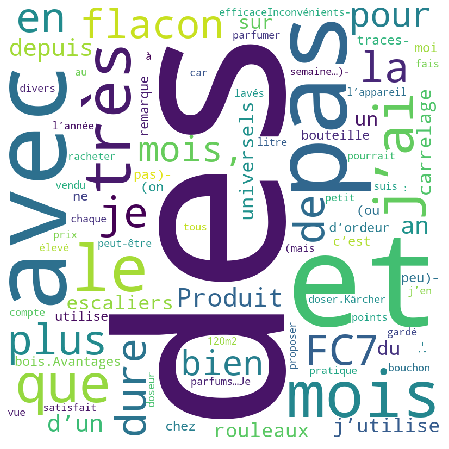

In [67]:
# Example preprocessed corpus of text data
corpus = "Produit que j’ai depuis plus d’un an et que j’utilise avec un FC7 rouleaux universels sur du carrelage et des escaliers bois.Avantages :- pas de traces- pas d’ordeur (ou je ne la remarque pas)- la bouteille dure des mois et des mois (on en utilise très très peu)- chez moi c’est efficaceInconvénients- prix au litre élevé (mais le flacon dure des mois, des mois et des mois, je fais l’année avec pour 120m2 lavés chaque semaine…)- bouchon doseur pas pratique : j’ai gardé le petit flacon vendu avec l’appareil FC7 pour bien doser.Kärcher pourrait peut-être plus le parfumer et proposer divers parfums…Je compte bien en racheter car j’en suis très satisfait à tous points de vue"

# Split corpus into words
words = corpus.split()

# Compute word frequency distribution
freq_dist = FreqDist(words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(freq_dist)

# Display the generated wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()